In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read data from csv file
data = pd.read_csv('mnist_test.csv')
X = data.iloc[:, 1:]
true_labels = data.iloc[:, 0]
kmeans_result = {}

In [3]:
# kmeans running one time
def kmeans(X):
    numClusters = 10
    kmeans = KMeans(n_clusters=numClusters)
    kmeans = kmeans.fit(X)  # fit the data
    pred_labels = kmeans.predict(X)  # Getting the predicted labels, clusters, cost value 
    centroids = kmeans.cluster_centers_
    cost = kmeans.inertia_  # sum of euclidean distance from the centroids
    return pred_labels, centroids, cost

In [4]:
# run k_means 10 times
for i in range(10):
    pred_labels, centroids, cost = kmeans(X)
    kmeans_result[round(cost)] = (pred_labels, centroids)

# print the result
print('The cost values of the kmeans clustering are: {}'.format(kmeans_result.keys()))
print('\nSo the output are not always the same.')
optimal_index = sorted(kmeans_result)[0]
print('The minimum cost value is: {}.'.format(optimal_index))
m_pred_labels, m_centroids = kmeans_result[optimal_index]

The cost values of the kmeans clustering are: dict_keys([25319479663, 25318231696, 25317198117, 25316421420, 25316205865, 25316428621, 25317410305, 25318197055, 25321651821, 25316212521])

So the output are not always the same.
The minimum cost value is: 25316205865.


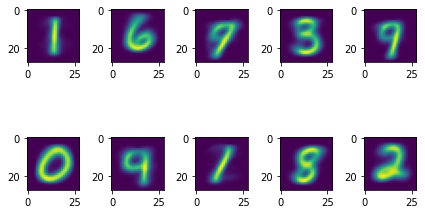

In [5]:
# show the centroids get from the best kmeans result as images
for i in range(1, 11):
    plt.subplot(2, 5, i)
    plt.imshow(m_centroids[i-1].reshape(28,28))
plt.tight_layout()

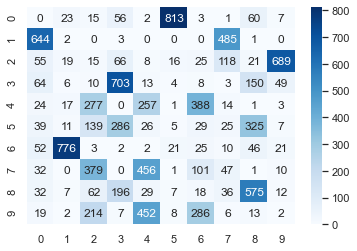

In [6]:
# create and show the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(true_labels, m_pred_labels)

import seaborn as sns
sns.set()
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

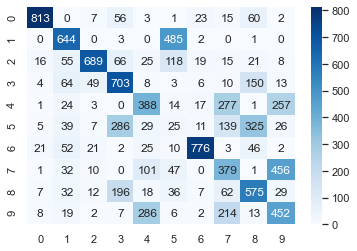

In [7]:
# do linear assignment to match the labels
from scipy.optimize import linear_sum_assignment as linear_assignment
import numpy as np

def _make_cost_m(cm):
    s = np.max(cm)
    return (- cm + s)
indexes = linear_assignment(_make_cost_m(cm))
indexes = np.asarray(indexes)
indexes = np.transpose(indexes)
js = [e[1] for e in sorted(indexes, key=lambda x: x[0])]
cm2 = cm[:, js]
sns.set()
ax = sns.heatmap(cm2, annot=True, fmt="d", cmap="Blues")

In [8]:
# compute accuracy
print('The accuracy is: ', round(np.trace(cm2) / np.sum(cm2), 3))

The accuracy is:  0.544
